# Project: No_show_appointments



## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. the Brasilian welfare program Bolsa familia, an anti-poverty scheme by the Brazilian government compels beneficiaries to be fully vaccinated and also enroled in school. A number of characteristics about the patient are included in each row.

ScheduledDay : tells us on what day the patient set up their appointment.

Neighborhood : indicates the location of the hospital.

Scholarship  : indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

No_show: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

Diabetes: indicates wheather the patient is diabetic or not

Handcap: Tells if a patient is Handicap





### Question(s) for Analysis
1. Identify important factors to predict if a patient will show up for their scheduled appointment?

2.  The numbers of the male and female genders that showed up for appointment

3. The Age group that keep to their appointment most

In [1]:
# importing the following packages

import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to load the dataset
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')

# Data Wrangling

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# check the data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
#check for missing values
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [8]:
#check for duplicates
sum(df.duplicated())

0


### Data Cleaning
The No_show_appointments dataset contains 110527 rows and 14 columns.There are no missing values and no duplicates. 
Data type for Scheduled_Day requires to change to datetime       , 
ScheduledDay and No-show colums were renamed.
PatientId, AppointmentID and AppointmentDay columns were deleted as they were not relevant to the analysis.

In [9]:

#droppig some columns not needed
df.drop(['PatientId', 'AppointmentID', 'AppointmentDay'], axis=1, inplace= True)

# source code: Udacity(juno)

In [10]:
#Rename some columns  

df.rename(columns ={"ScheduledDay" :"Scheduled_Day", "No-show" :"No_show"}, inplace=True)

# source code: Udacity(juno)

In [11]:
# slicing off the letter z in the Scheduled_Day column
df.Scheduled_Day.str.slice(-1).head(2)

# source code: stackoverflow

0    Z
1    Z
Name: Scheduled_Day, dtype: object

In [12]:
df['Scheduled_Day'] = pd.to_datetime(df.Scheduled_Day)

# source code: Udacity(juno)

In [13]:
#confirm the data type of Scheduled_Day to datetime
df.dtypes

Gender                   object
Scheduled_Day    datetime64[ns]
Age                       int64
Neighbourhood            object
Scholarship               int64
Hipertension              int64
Diabetes                  int64
Alcoholism                int64
Handcap                   int64
SMS_received              int64
No_show                  object
dtype: object

In [14]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
# to check for maximum age
df['Age'].max()

115

In [16]:
#categorization of age into age group, since the ade has upto 104 distnct numbers
df.loc[df['Age']<=19, 'Age_group']= 'Teenager'
df.loc[df['Age']>=20, 'Age_group']= 'Adults'
df.loc[df['Age']>=50, 'Age_group']= 'Elders'
df.loc[df['Age']>79, 'Age_group']= 'Old_People'

# source code: stackoverflow.com

In [17]:
#print the dataset
df.tail()

,Gender,Scheduled_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age_group
110522,F,2016-05-03 09:15:35,56,MARIA ORTIZ,0,0,0,0,0,1,No,Elders
110523,F,2016-05-03 07:27:33,51,MARIA ORTIZ,0,0,0,0,0,1,No,Elders
110524,F,2016-04-27 16:03:52,21,MARIA ORTIZ,0,0,0,0,0,1,No,Adults
110525,F,2016-04-27 15:09:23,38,MARIA ORTIZ,0,0,0,0,0,1,No,Adults
110526,F,2016-04-27 13:30:56,54,MARIA ORTIZ,0,0,0,0,0,1,No,Elders


In [18]:
#checking for null values in the new column
df['Age_group'].isnull().any()

False

In [19]:
#confirming the age categories

df.query('Age == 115')

,Gender,Scheduled_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age_group
63912,F,2016-05-16 09:17:44,115,ANDORINHAS,0,0,0,0,1,0,Yes,Old_People
63915,F,2016-05-16 09:17:44,115,ANDORINHAS,0,0,0,0,1,0,Yes,Old_People
68127,F,2016-04-08 14:29:17,115,ANDORINHAS,0,0,0,0,1,0,Yes,Old_People
76284,F,2016-05-30 09:44:51,115,ANDORINHAS,0,0,0,0,1,0,No,Old_People
97666,F,2016-05-19 07:57:56,115,SÃO JOSÉ,0,1,0,0,0,1,No,Old_People


In [20]:
df['SMS_received'].unique()

array([0, 1])

## Exploratory Data Analysis

Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1
Identify important factors to predict if a patient will show up for their scheduled appointment?

The distribution of the male and female genders

The age range that keep to their appointment most

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92af723198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f92aff1df60>]], dtype=object)

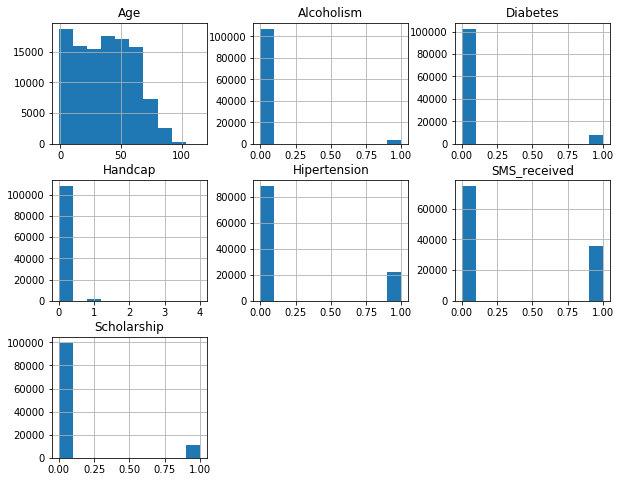

In [21]:
# to check distributions
df.hist(figsize=(10,8))

## No_show column is a dependent column and i want to check for the factors that influenced honoring the appointment such as :

*Scheduled_Day
* Gender
*Age
*Scholarship
*Hipertension etc

## to check the booking schedule for each year

In [22]:
## the total number of booking for each year, extracting year from datetime column
scheduled_year = df.Scheduled_Day.dt.year.value_counts()
scheduled_year



## Source code : shorturl.at/eopr9

2016    110465
2015        62
Name: Scheduled_Day, dtype: int64

In [23]:
#creating new rows dor those that showed up and those that did not
Showed_up = df.No_show=='No'
Not_showed_up = df.No_show=='Yes'

In [24]:
#creating new rows and a function to plot the size of people that showed up for their appointment

def bar_chart(column):
    Showed_up = df[df['No_show']=='No'][column].value_counts()
    Not_showed_up = df[df['No_show']=='Yes'][column].value_counts()
    df1 = pd.DataFrame([Showed_up, Not_showed_up])
    df1.index=['Showed_up', 'Not_showed_up']
    df1.plot(kind='bar', figsize=(10,5))
    
    
    
    #source code:https://www.kaggle.com/code/gyunpilpark/project

Text(0,0.5,'number of appointment')

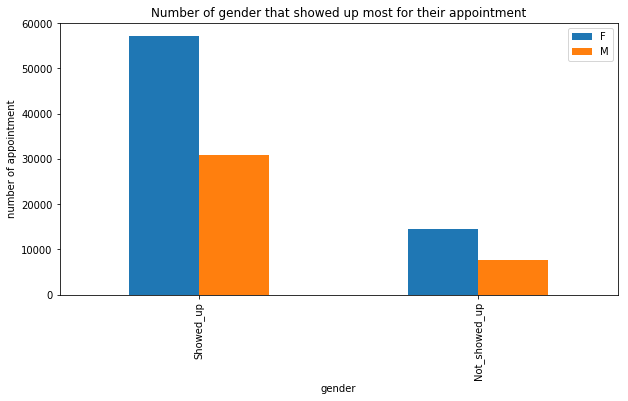

In [25]:
## Count by gender that showed up most for their appointments
bar_chart('Gender')
plt.title("Number of gender that showed up most for their appointment")
plt.xlabel("gender")
plt.ylabel("number of appointment")


In [26]:
# total number of appointments by gender
total_gender = df['Gender'].value_counts()
total_gender

F    71840
M    38687
Name: Gender, dtype: int64

In [27]:
## to check for the count of gender that showed up for appointment
df.groupby('Gender')['No_show'].value_counts()

Gender  No_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

## Scholarship

Text(0,0.5,'number of appointment')

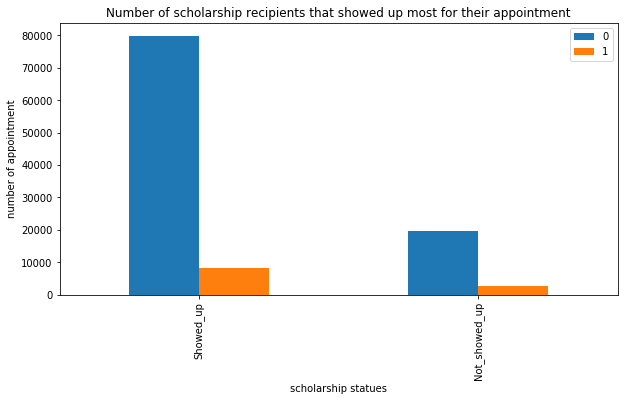

In [28]:
## Number of scholarship recipients that showed up most for their appointment
bar_chart('Scholarship')
plt.title('Number of scholarship recipients that showed up most for their appointment')
plt.xlabel('scholarship statues')
plt.ylabel('number of appointment')


In [44]:
# total number of appointments by scholarship statues
scholarship_statues = df['Scholarship'].value_counts()
scholarship_statues 

0    99666
1    10861
Name: Scholarship, dtype: int64

## Scheduled day

In [36]:
# schedule start date
start_day= df['Scheduled_Day'].min()
start_day

Timestamp('2015-11-10 07:13:56')

In [37]:
# schedule end date
end_day= df['Scheduled_Day'].max()
end_day

Timestamp('2016-06-08 20:07:23')

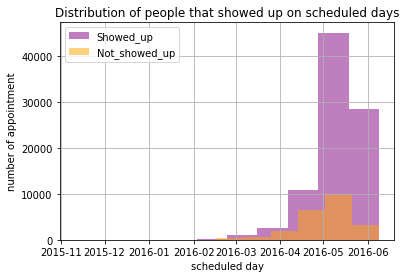

In [43]:
#to check the distribution of people that showed up to their appointments 
#and those that did not on their scheduled days

df.Scheduled_Day[Showed_up].hist(alpha=0.5, color='purple', label='Showed_up')
df.Scheduled_Day[Not_showed_up].hist(alpha=0.5, color='orange', label='Not_showed_up')
plt.title('Distribution of people that showed up on scheduled days')
plt.xlabel('scheduled day')
plt.ylabel('number of appointment')
plt.legend()

#code reference: udacity class(Juno)

## Question 5: The effect of health challenges in respect to appointments

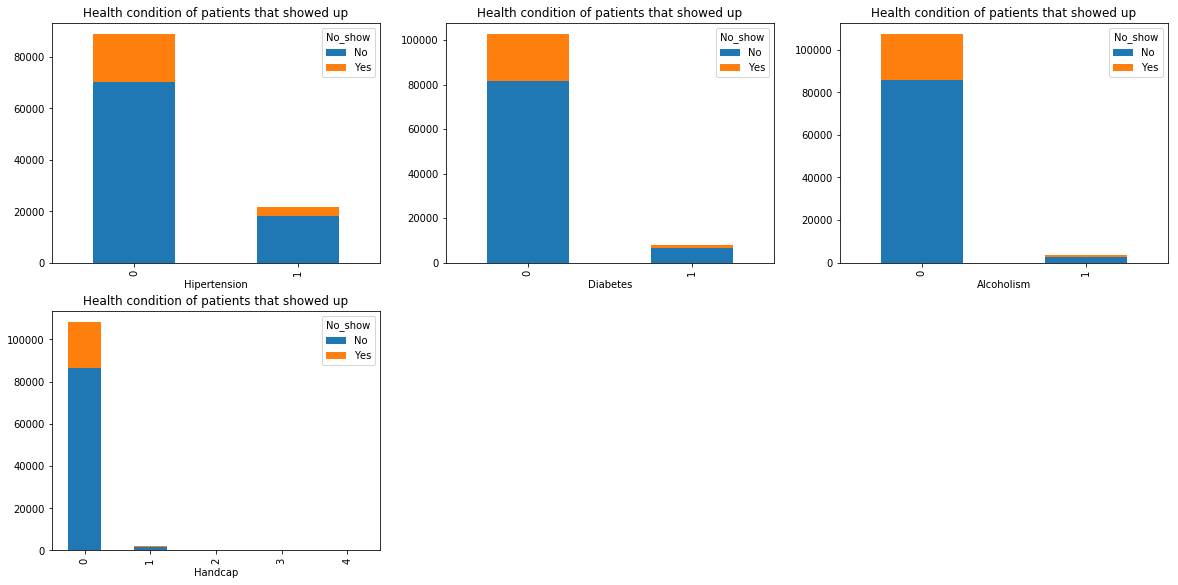

In [42]:
# Looking at the health categories; to check the health condition of patients that showed up
health_category = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

fig = plt.figure(figsize=(20,15))
for i, var in enumerate(health_category):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'No_show'])[var].count().unstack('No_show').plot(ax=ax, kind='bar', stacked=True, title= 'Health condition of patients that showed up')
    
    #source code: https://github.com/ksatola/Medical-Appointments-No-Shows/blob/master/no-shows-ks4-final.ipynb


In [31]:
# the count of different age categories that showed up and those that didn't
df.groupby('Diabetes')['No_show'].value_counts()

Diabetes  No_show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: No_show, dtype: int64

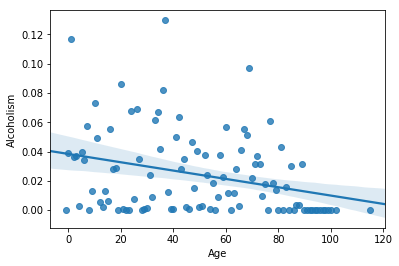

In [28]:
# to check the correlation between hipertension and age
Alcoholism_mean = df['Alcoholism'].groupby(df['Age']).mean()
ages = df['Age'].unique()
sns.regplot(x = ages, y = Alcoholism_mean)
plt.xlabel('Age')
plt.show()

#source code: https://janamalesova.github.io

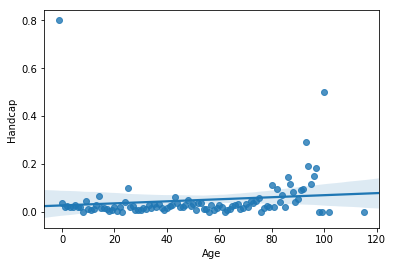

In [29]:
# # to check the correlation between hipertension and age

Handcap_mean = df['Handcap'].groupby(df['Age']).mean()
ages = df['Age'].unique()
sns.regplot(x = ages, y = Handcap_mean)
plt.xlabel('Age')
plt.show()

#source code: https://janamalesova.github.io

In [30]:
# the count hipertensive patients that showed up and those that didn't
df.groupby('Hipertension')['No_show'].value_counts()

Hipertension  No_show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: No_show, dtype: int64

## Question 3: to check the impact of age in showing up for appointments

Since the age distribution is very wild, i categorized age by the following range:

Teenager: (<=19)
Adults:(20-49)
Elders: (50-79)
Old_people:(79 and above)

In [30]:
# the count of different age categories that showed up and those that didn't
df.groupby('Age_group')['No_show'].value_counts()

Age_group   No_show
Adults      No         33519
            Yes         9560
Elders      No         28205
            Yes         5468
Old_People  No          2813
            Yes          550
Teenager    No         23671
            Yes         6741
Name: No_show, dtype: int64

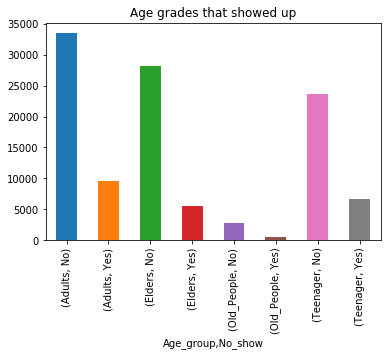

In [34]:
# age categories in graphical representation
df.groupby('Age_group')['No_show'].value_counts().plot(kind='bar', title= 'Age grades that showed up')

In [32]:
# the mean age of those scheduled for appointment
df.groupby(['No_show'], as_index=False)['Age'].mean()

#code reference: udacity class(Juno)

,No_show,Age
0,No,37.790064
1,Yes,34.317667



## Conclusions

The data was cleaned before analysis, I had to drop some columes that i guessed were not needed for my analysis. Diad some data type changes and renamed some columns.

 Exploration of the No_show_appointment dataset reveals that 110527 total number of  patients were scheduled for appointments. The patients consists of people of different backgroud(neighbourhood), health statues (such as Diabetetes, Hipertension,Alcoholism, Handcap), as well as of different age groups. The Analysis shows;
 
>: Out of 110527 patients, 88208 patients showed up for appointment on their scheduled day, whereas 22319 patients did not show up. The start day for scheduling was on 2015-11-10 and ended on 2016-06-08 .

>:The patient's booking was for a two years period (2015-2016) that took place for just seven month (January, February, March, April, May ,June, November and December). The distribution graph of scheduled_Day against No_show is skewed to the left with just 62 persons scheduled in 2015 as against 110465 persons scheduled in 2016.

>: Patients from age -1 to 115 were scheduled for appontment. From the analysis, the mean age being 37.7 approximately 38 years. Patients aged from 20-49 years (adults) showed up most for their appointments with those aged 70 and above(old_people) having least attendance. A right skewed graph was produced. 

>: Scholarship statues had little influence on keeping to schedule as majority that honoured their appointment were not on scholarship. Out of 110527 patients scheduled for appointment, only 10861 were on scholarship and 99666 patients were not on scholarship. A total of 79925 patients that did not have of their scholarship starues showed up against 19741 who did not.
Out of 10861 that were on scholarship, 8283 showed up for appointnment whereas 2578 did not.

>: Alcoholism decreased with age.

>: The number of females booked were more than that of men. A total of 71840 females as against 38687 men scheduled appointment and more females showed up.

>: Among 7943 diabetic patients scheduled for appointment, 6513 showed up while 1430 did not show up. It is important to note that most patients were not diabetic.

 >:Majority of patients did not have hipertension. Total number of hipertensives was 21801 were booked for appointment. 18029 hypertensive patients showed up whereas 3772 did not show up.
 
 >: There were four degree of handcap patients 1,2,3,4 with the numbers that showed up (1676, 146, 10 2) respectively as against (366,37,3,1) handcap patients that did not show up. More handcapped patients were found among the elderly 80 years and above.
 > The mean age of patients scheduled for appointment is 37 years
 
                                 LIMITATION
>: The data consists of numerous numerical variables, hence minimal statistical analysis was carried out.

>: One obvious limitation is that there are no data on patients scheduled for appointment for the months of July, August September and October and no explanation was given. 





In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255